In [5]:
# Clear namespace
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Install package

In [6]:
#!pip install pydotplus

Import libraries

In [7]:
#Import libraries before starting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import pandas as pd
import pydotplus
import seaborn as sns

### Functions (necessary for the following calculations)

In [9]:
#--------  display_dt
# Print decision tree model 'model', already fitted
# Input: 
#      model     (Decision tree model)
# Returns: 
#      None

def display_dt(model):
    dummy_io = StringIO() 
    tree.export_graphviz(dt, out_file = dummy_io) 
    print( dummy_io.getvalue())

In [10]:
#--------  print_tree
# This function creates images of tree models using pydotplus
# Input: 
#      estimator   (Decision tree model)
#      features    (Decision tree features)
#      class_names (Names of the classes)
# Returns: 
#      graph     (Decision tree graph )
# Source:
#      https://github.com/JWarmenhoven/ISLR-python

from io import StringIO
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO.StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, proportion=True, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)


In [11]:
#Code here
# Load the training data
train_data = np.loadtxt('dataset_5_train.txt', delimiter=',')

# Load the test data
test_data = np.loadtxt('dataset_5_test.txt', delimiter=',')

### First look at the data

In [13]:
import pandas as pd
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Check the shape of the datasets
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

# Check the first few rows of the datasets
print("\nTrain Data - First Few Rows:")
print(train_df.head())

print("\nTest Data - First Few Rows:")
print(test_df.head())



Train Data Shape: (250, 25)
Test Data Shape: (9750, 25)

Train Data - First Few Rows:
       0         1    2    3    4     5    6    7    8    9   ...       15   
0  3288.0   20000.0  2.0  1.0  2.0  39.0  0.0  0.0  0.0  0.0  ...  19308.0  \
1  3001.0   50000.0  1.0  2.0  2.0  27.0  2.0  2.0  0.0  0.0  ...   7382.0   
2  3288.0   80000.0  1.0  2.0  2.0  27.0  1.0  2.0  2.0  2.0  ...  68531.0   
3  3652.0   70000.0  2.0  2.0  2.0  22.0  0.0  0.0  0.0  0.0  ...  69316.0   
4  3817.0  200000.0  1.0  1.0  2.0  24.0 -1.0 -1.0 -1.0 -1.0  ...  18154.0   

        16       17      18      19       20      21       22       23   24  
0  19498.0      0.0  1588.0  1770.0   1200.0   390.0      0.0  44334.0  1.0  
1   1975.0  50514.0  4146.0  1200.0      0.0     0.0  49800.0      0.0  1.0  
2  69808.0  70544.0  5000.0  3100.0   2000.0  3000.0   2000.0   4000.0  1.0  
3  29083.0  28140.0  3200.0  3600.0   3075.0  1204.0   1200.0   1046.0  0.0  
4  13677.0   2018.0   200.0   198.0  18156.0     0.0   

###Data cleanup

In [15]:
# Check for missing values in the datasets
print("\nMissing Values - Train Data:")
print(train_df.isnull().sum())

print("\nMissing Values - Test Data:")
print(test_df.isnull().sum())

# Check the data types of the columns
print("\nData Types - Train Data:")
print(train_df.dtypes)

print("\nData Types - Test Data:")
print(test_df.dtypes)


Missing Values - Train Data:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

Missing Values - Test Data:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

Data Types - Train Data:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
dtype: object

Data Types - Test Data:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7 

### Prepare data for modelling

In [17]:

# Eliminate null values by removing rows with missing values
train_data_clean = train_data[~np.isnan(train_data).any(axis=1)]
test_data_clean = test_data[~np.isnan(test_data).any(axis=1)]

print("\nCleaned Train Data shape:")
print(train_data_clean.shape)

print("\nCleaned Test Data shape:")
print(test_data_clean.shape)
#X_train = train_data[:, :-1]  # Features
#y_train = train_data[:, -1]   # Target variable

# Separate the features (attributes) and the target variable for the test data
#X_test = test_data[:, :-1]    # Features
#y_test = test_data[:, -1]     # Target variable


Cleaned Train Data shape:
(250, 25)

Cleaned Test Data shape:
(9750, 25)


### Modelling

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Convert cleaned train and test data to DataFrames
train_data_clean = pd.DataFrame(train_data_clean)
test_data_clean = pd.DataFrame(test_data_clean)

# Assign column names to train and test data
train_data_clean.columns = ['feature_' + str(i) for i in range(25)]
test_data_clean.columns = ['feature_' + str(i) for i in range(25)]

# Split the cleaned data into input features and labels
try: 
    X_train = train_data_clean.drop(columns=['feature_24'])
    y_train = train_data_clean['feature_24']
except: 
    pass

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Predict labels for test data
X_test = test_data_clean.drop(columns=['feature_24'])
y_test = test_data_clean['feature_24']
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8318974358974359


### Visualization

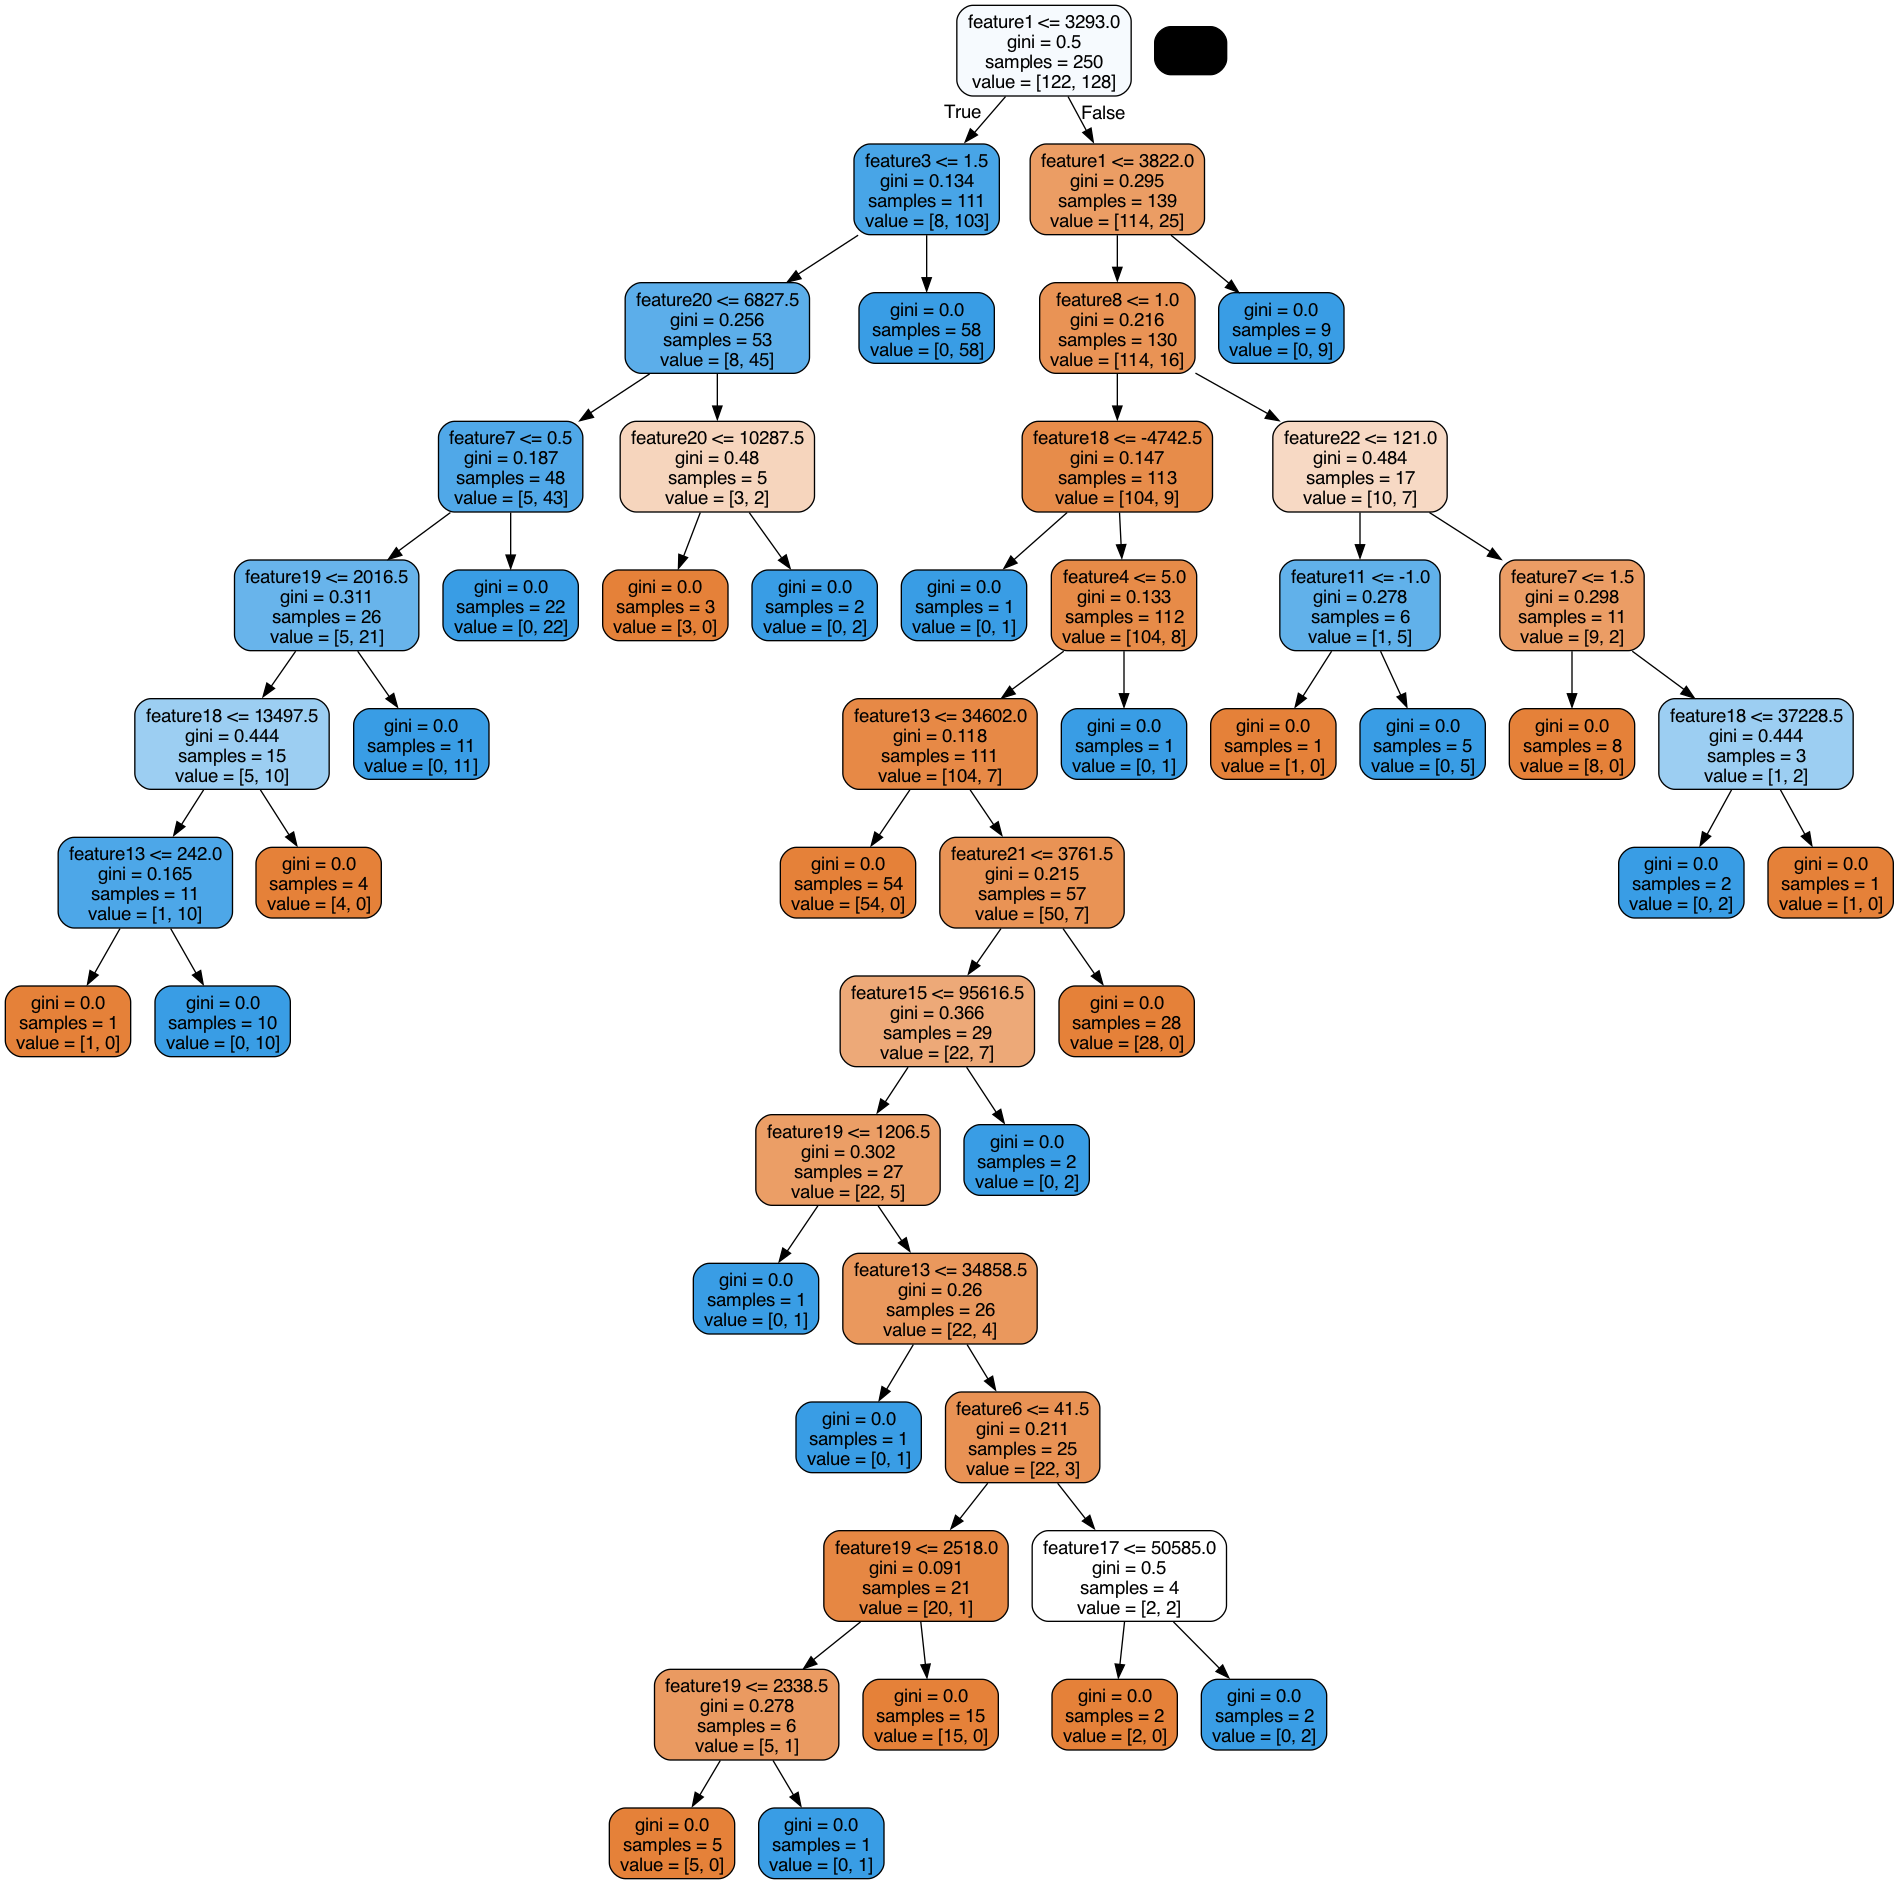

In [21]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Define the feature names
feature_names = ['feature' + str(i) for i in range(1, 25)]

# Export the decision tree as DOT file
dot_data = export_graphviz(dt, out_file=None, feature_names=feature_names, filled=True, rounded=True)

# Create a graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Generate the image file
graph.write_png("decision_tree.png")

# Display the decision tree
Image(graph.create_png())
